优化算法:使用Keras提供的其他优化器，如梯度下降，看在其他算法下模型参数对模型训练和过拟合的速度有怎样的影响。
损失函数:尝试使用Keras其他可用的损失函数，探究选用其他的损失函数是否可以提升模型的性能。
学习率与迭代次数更新策略
更大的Batch Size:使用更大的Batch Size意味着模型在训练集和测试集上的数据操作规模更大了

In [1]:
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.applications.inception_v3 import preprocess_input
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

from keras.layers import *
#from keras.layers import Input
from keras.models import *
#from keras.models import Model
#from keras.layers import Input, Dense
#a = Input(shape=(32,))
#b = Dense(32)(a)
#model = Model(inputs=a, outputs=b)
from keras.callbacks import *
from keras.optimizers import *
from keras.regularizers import *
from keras import initializers
from keras.applications import *

plt.ion()   # interactive mode 画图不阻止程序运行
#from keras.utils import multi_gpu_model 
#from keras.applications import ResNet50
#from keras.applications import VGG16
#from keras.applications import VGG19
#from keras.applications import Xception # TensorFlow ONLY
#from keras.applications import InceptionResNetV2
#from keras.applications import InceptionV3

#tf.keras.applications.inception_v3.InceptionV3
#tf.keras.applications.inception_resnet_v2.InceptionResNetV2
####################################################################
#设置GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
#os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

#设置项
#看具体的模型参数设置在:https://www.tensorflow.org/api_docs/python/tf/keras/applications
MODELS = {"InceptionResNetV2":InceptionResNetV2}
#MODELS = {"DenseNet121":DenseNet121,"DenseNet201":DenseNet201,"InceptionResNetV2":InceptionResNetV2}
#"InceptionV3":InceptionV3,"DenseNet121":DenseNet121,
 #       "DenseNet169":DenseNet169,"DenseNet201":DenseNet201,"Xception":Xception, 
 #       "InceptionResNetV2":InceptionResNetV2,
#"ResNet50":ResNet50, 
#"VGG16":VGG16,"VGG16":VGG19,"NASNetMobile":NASNetMobile

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

classes = ['collar_design_labels', 'neckline_design_labels', 'skirt_length_labels', 
           'sleeve_length_labels', 'neck_design_labels', 'lapel_design_labels', 
           'pant_length_labels','coat_length_labels']   
#classes = ['pant_length_labels','coat_length_labels']    
fai_result = []

Using TensorFlow backend.


######################在InceptionResNetV2下训练8个分类器####################
#######InceptionResNetV2:collar_design_labels####################
选择的属性为:collar_design_labels, 种类的为:5,样本数: 8393
数据装载到内存完毕:InceptionResNetV2,collar_design_labels
Train on 7553 samples, validate on 840 samples
Epoch 1/40
7553/7553 [==============================] - 229s 30ms/step - loss: 0.9740 - acc: 0.6311 - val_loss: 0.7453 - val_acc: 0.7298

Epoch 00001: val_loss improved from inf to 0.74532, saving model to ../models/collar/collar_InceptionResNetV2v3.best.h5
Epoch 2/40
7553/7553 [==============================] - 211s 28ms/step - loss: 0.5590 - acc: 0.8097 - val_loss: 0.7895 - val_acc: 0.7738

Epoch 00002: val_loss did not improve
Epoch 3/40
7553/7553 [==============================] - 203s 27ms/step - loss: 0.3350 - acc: 0.8920 - val_loss: 0.6021 - val_acc: 0.7952

Epoch 00003: val_loss improved from 0.74532 to 0.60209, saving model to ../models/collar/collar_InceptionResNetV2v3.best.h5
Epoch 4/40
7553/7553 [=====

15433/15433 [==============================] - 436s 28ms/step - loss: 0.0187 - acc: 0.9944 - val_loss: 0.8728 - val_acc: 0.8391

Epoch 00011: val_loss did not improve
Epoch 12/40
15433/15433 [==============================] - 436s 28ms/step - loss: 0.0162 - acc: 0.9953 - val_loss: 0.8007 - val_acc: 0.8641

Epoch 00012: val_loss did not improve
Epoch 13/40
15433/15433 [==============================] - 440s 29ms/step - loss: 0.0096 - acc: 0.9973 - val_loss: 0.8827 - val_acc: 0.8641

Epoch 00013: val_loss did not improve
Epoch 14/40
15433/15433 [==============================] - 439s 28ms/step - loss: 0.0096 - acc: 0.9980 - val_loss: 0.8482 - val_acc: 0.8641

Epoch 00014: val_loss did not improve
Epoch 15/40
15433/15433 [==============================] - 436s 28ms/step - loss: 0.0097 - acc: 0.9976 - val_loss: 0.8399 - val_acc: 0.8676

Epoch 00015: val_loss did not improve
Epoch 16/40
15433/15433 [==============================] - 439s 28ms/step - loss: 0.0075 - acc: 0.9973 - val_loss: 0.


Epoch 00022: val_loss did not improve
Epoch 23/40
17399/17399 [==============================] - 513s 29ms/step - loss: 3.0653e-04 - acc: 0.9998 - val_loss: 0.2197 - val_acc: 0.9731

Epoch 00023: val_loss did not improve
Epoch 24/40
17399/17399 [==============================] - 512s 29ms/step - loss: 3.8826e-04 - acc: 0.9998 - val_loss: 0.2203 - val_acc: 0.9741

Epoch 00024: val_loss did not improve
Epoch 25/40
17399/17399 [==============================] - 513s 29ms/step - loss: 5.4216e-04 - acc: 0.9998 - val_loss: 0.2188 - val_acc: 0.9741

Epoch 00025: val_loss did not improve
Epoch 26/40
17399/17399 [==============================] - 515s 30ms/step - loss: 3.7122e-04 - acc: 0.9998 - val_loss: 0.2189 - val_acc: 0.9731

Epoch 00026: val_loss did not improve
Epoch 27/40
17399/17399 [==============================] - 515s 30ms/step - loss: 2.2523e-04 - acc: 0.9999 - val_loss: 0.2198 - val_acc: 0.9731

Epoch 00027: val_loss did not improve
Epoch 28/40
17399/17399 [=====================


Epoch 00032: val_loss did not improve
Epoch 33/40
11969/11969 [==============================] - 351s 29ms/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.7245 - val_acc: 0.8902

Epoch 00033: val_loss did not improve
[]
#######InceptionResNetV2:neck_design_labels####################
选择的属性为:neck_design_labels, 种类的为:5,样本数: 5696
数据装载到内存完毕:InceptionResNetV2,neck_design_labels
Train on 5126 samples, validate on 570 samples
Epoch 1/40
5126/5126 [==============================] - 206s 40ms/step - loss: 1.1503 - acc: 0.5548 - val_loss: 1.3054 - val_acc: 0.6035

Epoch 00001: val_loss improved from inf to 1.30543, saving model to ../models/neck/neck_InceptionResNetV2v3.best.h5
Epoch 2/40
5126/5126 [==============================] - 158s 31ms/step - loss: 0.6827 - acc: 0.7593 - val_loss: 1.1125 - val_acc: 0.6737

Epoch 00002: val_loss improved from 1.30543 to 1.11248, saving model to ../models/neck/neck_InceptionResNetV2v3.best.h5
Epoch 3/40
5126/5126 [==============================] - 158s 31ms

Epoch 7/40
6330/6330 [==============================] - 181s 29ms/step - loss: 0.0577 - acc: 0.9833 - val_loss: 0.8025 - val_acc: 0.8239

Epoch 00007: val_loss did not improve
Epoch 8/40
6330/6330 [==============================] - 180s 28ms/step - loss: 0.0400 - acc: 0.9867 - val_loss: 0.6160 - val_acc: 0.8722

Epoch 00008: val_loss did not improve
Epoch 9/40
6330/6330 [==============================] - 180s 28ms/step - loss: 0.0459 - acc: 0.9853 - val_loss: 1.4784 - val_acc: 0.7401

Epoch 00009: val_loss did not improve
Epoch 10/40
6330/6330 [==============================] - 179s 28ms/step - loss: 0.0352 - acc: 0.9900 - val_loss: 0.7492 - val_acc: 0.8324

Epoch 00010: val_loss did not improve
Epoch 11/40
6330/6330 [==============================] - 180s 28ms/step - loss: 0.0271 - acc: 0.9916 - val_loss: 0.5765 - val_acc: 0.8736

Epoch 00011: val_loss improved from 0.58409 to 0.57654, saving model to ../models/lapel/lapel_InceptionResNetV2v3.best.h5
Epoch 12/40
6330/6330 [===========

6714/6714 [==============================] - 207s 31ms/step - loss: 0.0436 - acc: 0.9881 - val_loss: 0.7415 - val_acc: 0.8365

Epoch 00010: val_loss did not improve
Epoch 11/40
6714/6714 [==============================] - 205s 31ms/step - loss: 0.0325 - acc: 0.9900 - val_loss: 0.7807 - val_acc: 0.8378

Epoch 00011: val_loss did not improve
Epoch 12/40
6714/6714 [==============================] - 206s 31ms/step - loss: 0.0241 - acc: 0.9933 - val_loss: 0.7671 - val_acc: 0.8458

Epoch 00012: val_loss did not improve
Epoch 13/40
6714/6714 [==============================] - 206s 31ms/step - loss: 0.0152 - acc: 0.9954 - val_loss: 0.7723 - val_acc: 0.8566

Epoch 00013: val_loss did not improve
Epoch 14/40
6714/6714 [==============================] - 207s 31ms/step - loss: 0.0164 - acc: 0.9958 - val_loss: 0.7810 - val_acc: 0.8539

Epoch 00014: val_loss did not improve
Epoch 15/40
6714/6714 [==============================] - 206s 31ms/step - loss: 0.0109 - acc: 0.9967 - val_loss: 0.7547 - val_a


Epoch 00023: val_loss did not improve
Epoch 24/40
10188/10188 [==============================] - 319s 31ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.8099 - val_acc: 0.8719

Epoch 00024: val_loss did not improve
Epoch 25/40
10188/10188 [==============================] - 318s 31ms/step - loss: 0.0027 - acc: 0.9994 - val_loss: 0.8376 - val_acc: 0.8754

Epoch 00025: val_loss did not improve
Epoch 26/40
10188/10188 [==============================] - 317s 31ms/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.8519 - val_acc: 0.8693

Epoch 00026: val_loss did not improve
Epoch 27/40
10188/10188 [==============================] - 319s 31ms/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.8541 - val_acc: 0.8710

Epoch 00027: val_loss did not improve
Epoch 28/40
10188/10188 [==============================] - 317s 31ms/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.9096 - val_acc: 0.8675

Epoch 00028: val_loss did not improve
Epoch 29/40
10188/10188 [==============================] - 319s 31

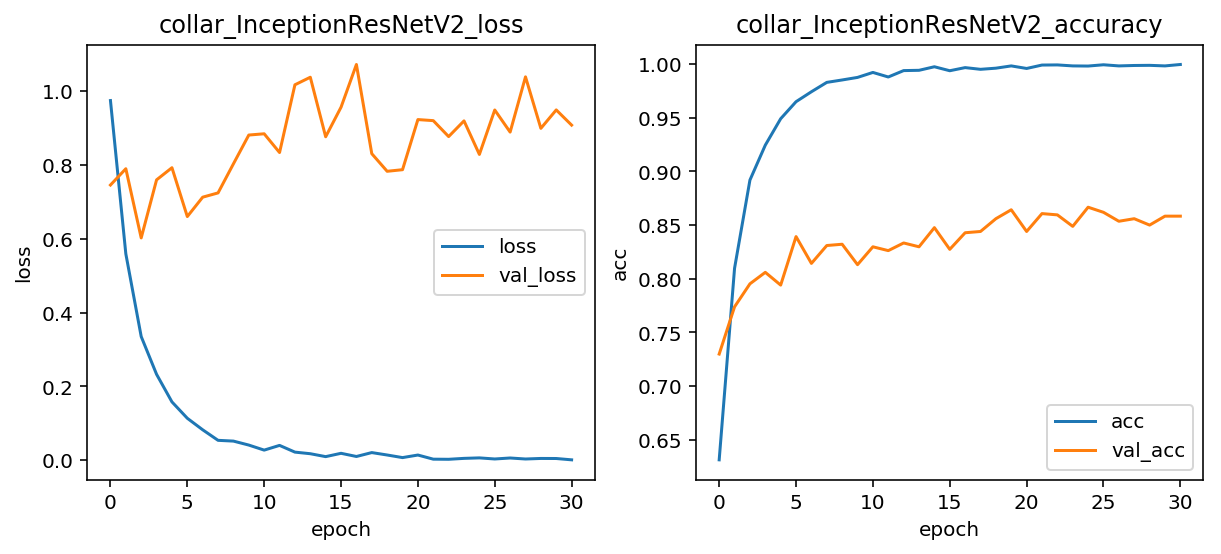

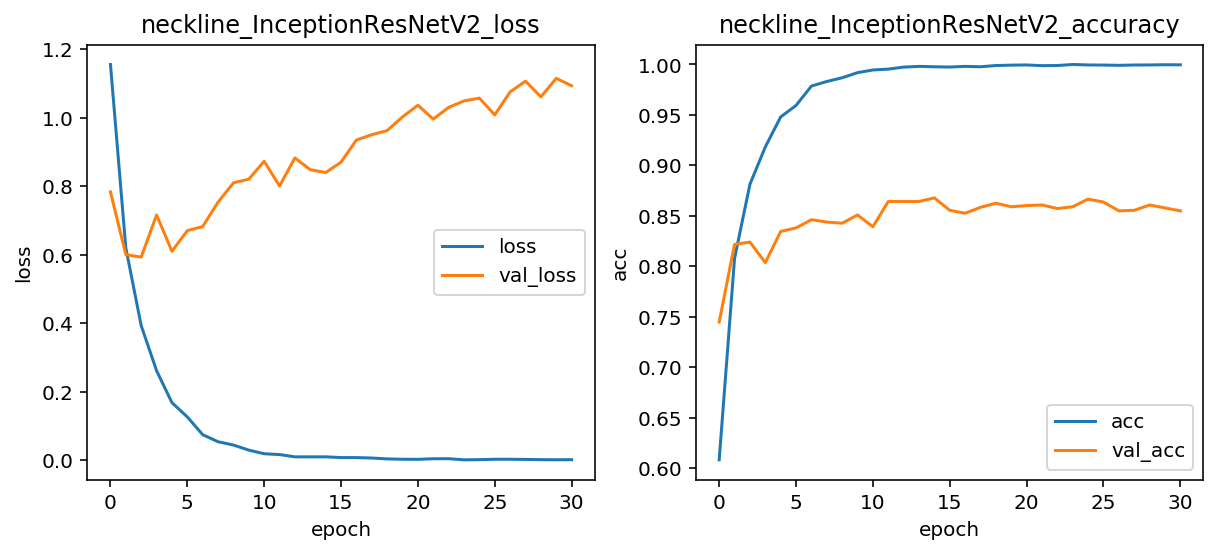

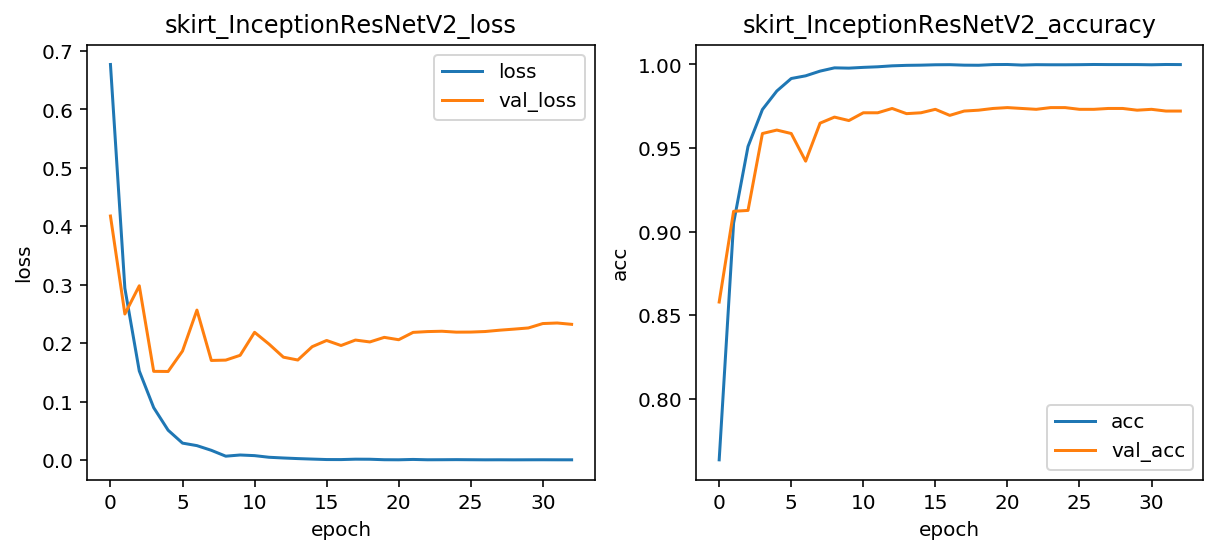

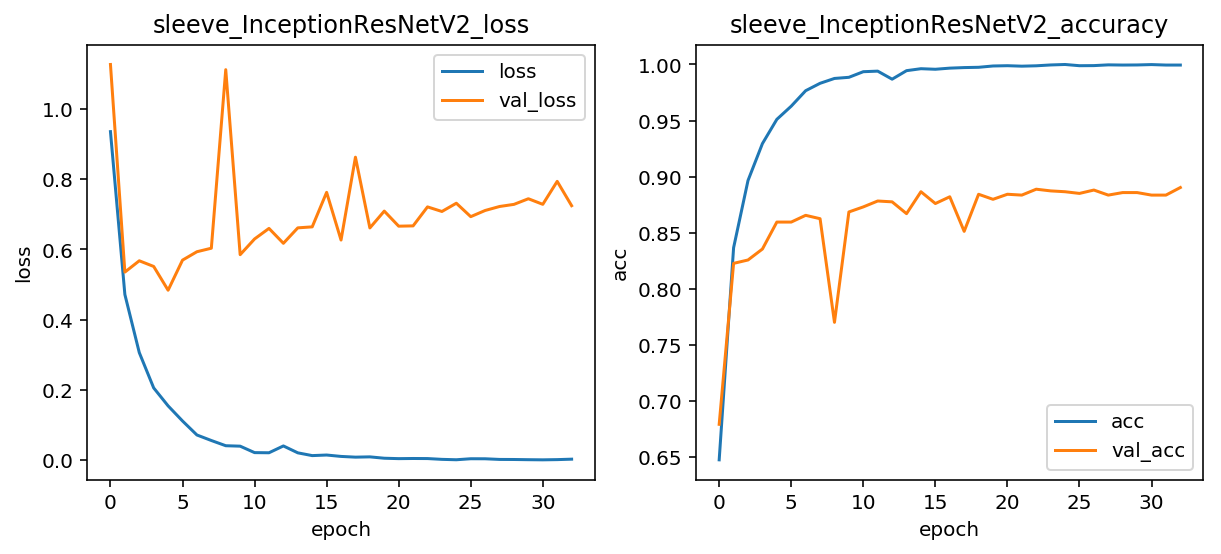

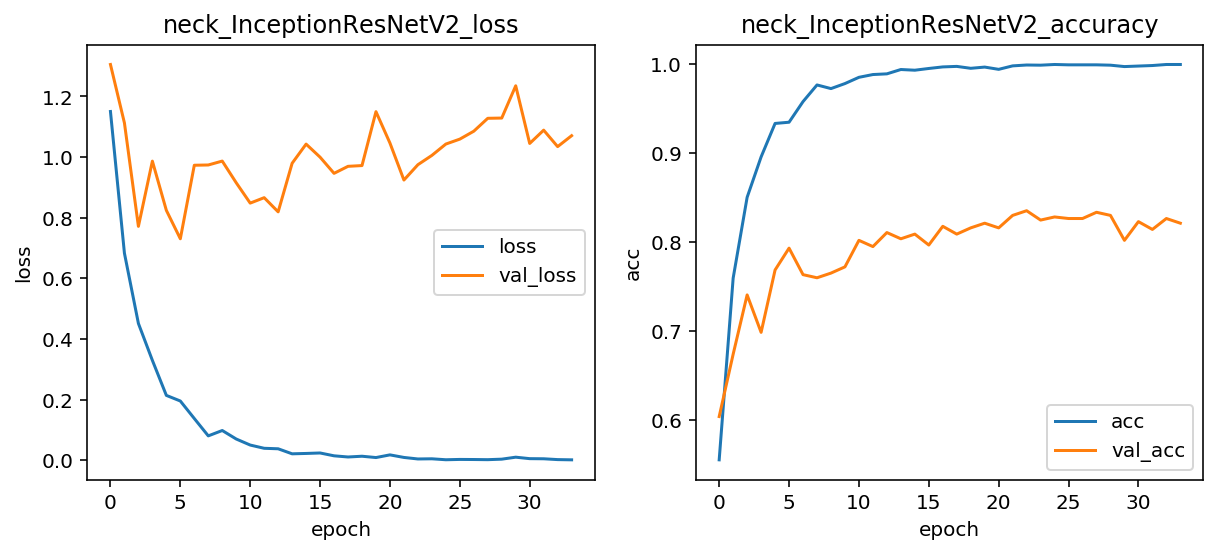

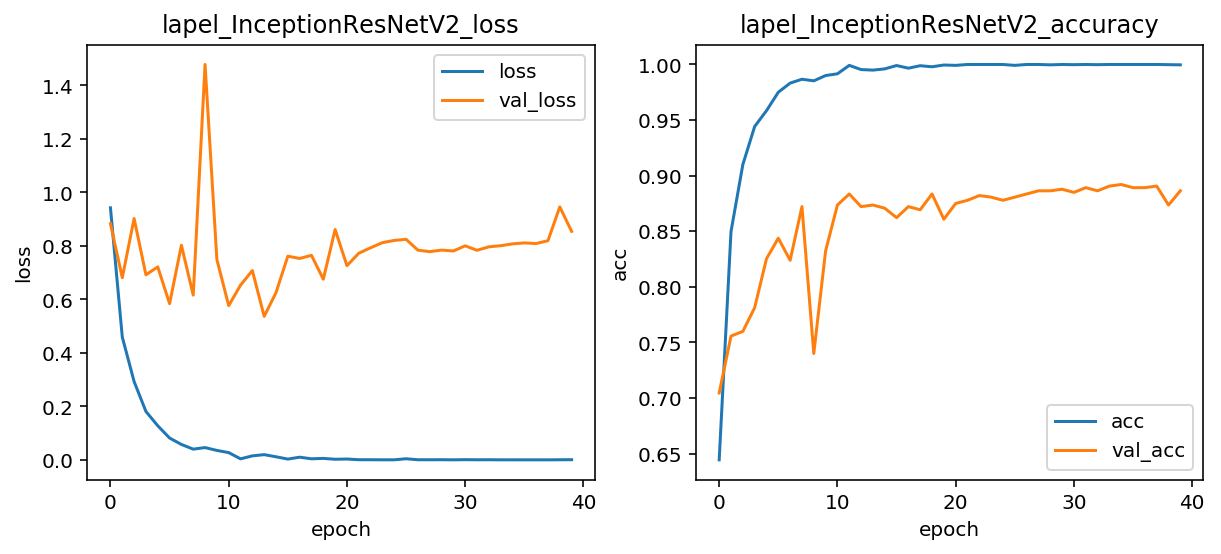

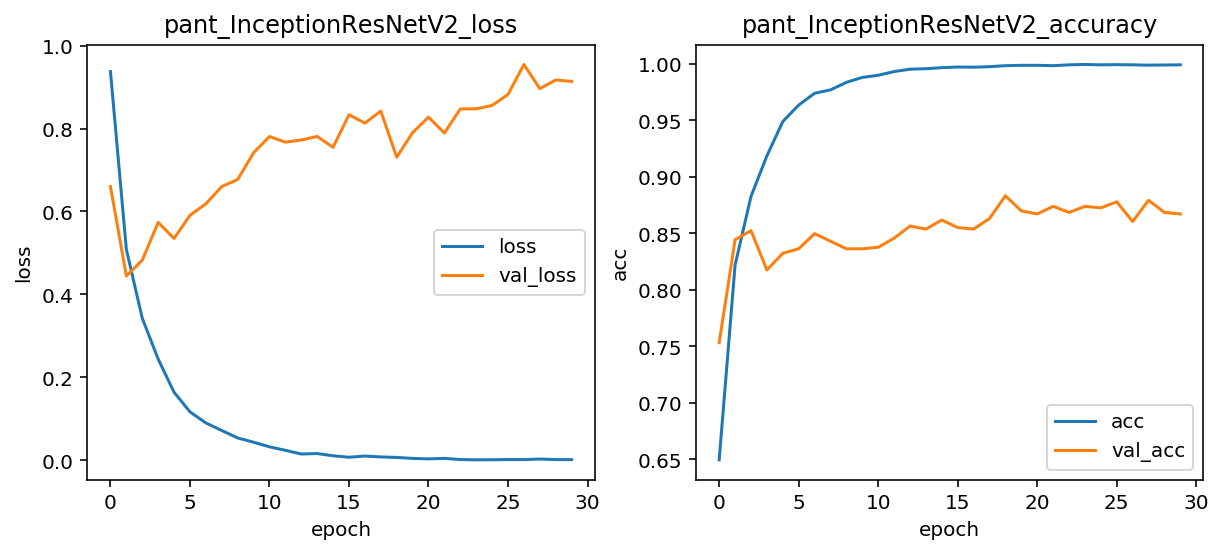

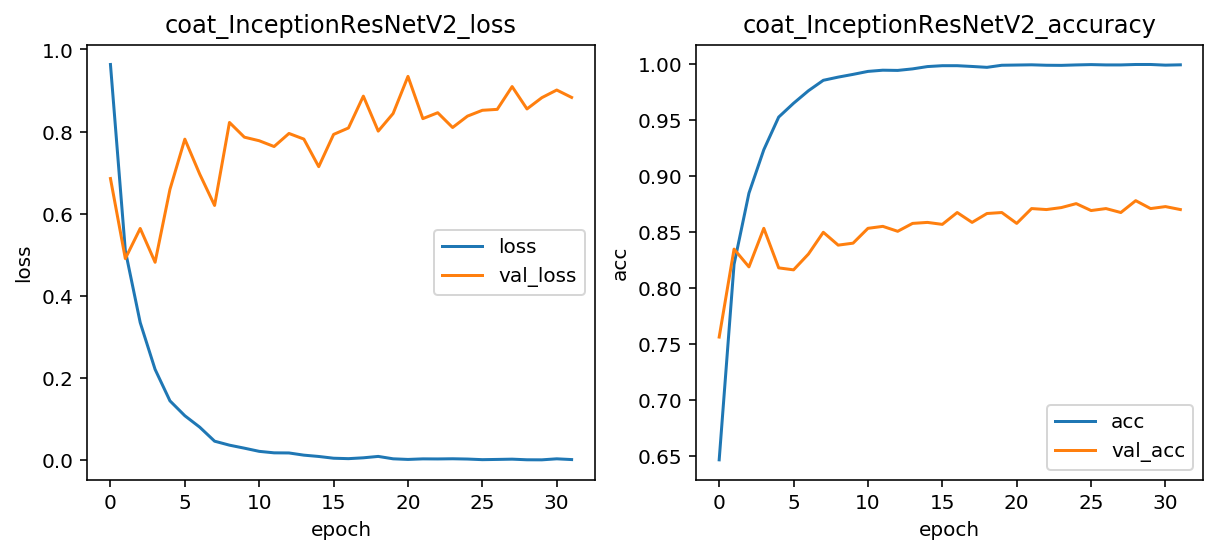

In [2]:
for KEY, MODLE in MODELS.items():
    #
    #为299*299,设置如下
    ppreprocess = preprocess_input
    if KEY in ["InceptionV3","Xception", "InceptionResNetV2"]:
        width = 299
    elif KEY == "NASNetLarge":
        width = 331
    else:
        width = 224
        ppreprocess = imagenet_utils.preprocess_input 
    print('######################在{0}下训练8个分类器####################'.format(KEY))
    for cur_class in classes:
        print('#######{0}:{1}####################'.format(KEY,cur_class ))
        df_train = pd.read_csv('../train/Annotations/{0}.csv'.format(cur_class), header=None)
        df_train.columns = ['image_id', 'class', 'label']
        df_load = df_train.copy()
        df_load.reset_index(inplace=True)
        del df_load['index']
        print("选择的属性为:{0}, 种类的为:{1},样本数: {2}".format(cur_class , len(df_load['label'][0]),len(df_load)))
        
        n = len(df_load)
        n_class = len(df_load['label'][0])
        prefix_cls = cur_class.split('_')[0]
        
        X = np.zeros((n, width, width, 3), dtype=np.uint8)
        y = np.zeros((n, n_class), dtype=np.uint8)
        for i in range(n):
            tmp_label = df_load['label'][i]
            if len(tmp_label) > n_class:
                print(df_load['image_id'][i])
            X[i] = cv2.resize(cv2.imread('../train/{0}'.format(df_load['image_id'][i])), (width, width))
            y[i][tmp_label.find('y')] = 1
        print("数据装载到内存完毕:{0},{1}".format(KEY,cur_class))
        #plt.figure(figsize=(12, 7))
        #for i in range(8):
            #random_index = random.randint(0, n-1)
            #plt.subplot(2, 4, i+1)
            #plt.imshow(X[random_index][:,:,::-1])
            #plt.title(y[random_index])
        #plt.savefig('../images/{0}/{0}_{1}.png'.format(prefix_cls, KEY),bbox_inches='tight')
        
        #设置模型的finetune细节
        cnn_model = MODLE(include_top=False, input_shape=(width, width, 3), weights='imagenet',pooling='avg')
        inputs = Input((width, width, 3))
        x = inputs
        x = Lambda(ppreprocess, name='preprocessing')(x)
        x = cnn_model(x)
        #下面是新加的层
        #x = GlobalAveragePooling2D()(x)
        x = Dropout(0.5)(x)
        #x = Flatten(name='flatten')(x)
        x = Dense(1024, activation='relu', name='fc1')(x)
        # n_class为对应属性的分类个数
        x = Dense(512, activation='relu', kernel_initializer=initializers.he_uniform(seed=None),name='fc2')(x)
        x = Dropout(0.5)(x)
        x = Dense(n_class, activation='softmax', name='softmax')(x)

        model = Model(inputs, x)
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=50)
        
        sgd = SGD(lr=0.01, decay=0.01/45, momentum=0.9, nesterov=True)
        #adam = optimizers.Adam(lr=1e-4)
        #optimizer=sgd(lr=0.001, momentum=0.9, nesterov=True))
        #adam = Adam(lr=0.0001)
        
        #多GPU训练,因为keras设计的自动保存最好模型,但是多GPU训练,其save()就没法用了
        #model = multi_gpu_model(model, 2)  

        model.compile(optimizer=sgd,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Callback that implements learning rate schedule
#schedule = Step([20], [1e-4, 1e-6])
#history = model.fit(X_train, Y_train,
#                    batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test,Y_test),
#                    callbacks=[
#                           schedule,
#                           keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0,save_best_only=True, mode='auto')

# 该回调函数将在每个epoch后保存模型到filepath
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0,save_best_only=True, mode='auto')
# 当监测值不再改善时，该回调函数将中止训练.
#当early stop被激活（如发现loss相比上一个epoch训练没有下降），则经过patience个epoch后停止训练
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

        #设置训练完之后,最好的模型保存路径
        checkpointer = ModelCheckpoint(filepath='../models/{0}/{0}_{1}v3.best.h5'.format(prefix_cls,KEY), verbose=1, 
                                   save_best_only=True)
        #训练开始,并保存训练过程的loss和acc变化
        h = model.fit(X_train, y_train, batch_size=16, epochs=40, 
                      callbacks=[EarlyStopping(patience=28), checkpointer], 
                      shuffle=True, 
                      validation_data=(X_valid,y_valid))
        #是指取最后一个epochs训练得到的模型做一次整个验证集的准确率测试
        #score = model.evaluate(X_valid,y_valid,batch_size=32,verbose=0)
        #print ('{0}_{1}验证平均accuracy:{2}'.format(prefix_cls,KEY,score[1]))
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(h.history['loss'])
        plt.plot(h.history['val_loss'])
        plt.legend(['loss', 'val_loss'])
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('{0}_{1}_loss'.format(prefix_cls, KEY))
        
        plt.subplot(1, 2, 2)
        plt.plot(h.history['acc'])
        plt.plot(h.history['val_acc'])
        plt.legend(['acc', 'val_acc'])
        plt.ylabel('acc')
        plt.xlabel('epoch')
        plt.title('{0}_{1}_accuracy'.format(prefix_cls, KEY))
        #保存训练损失和准确率变化的图像
        plt.savefig('../models/{0}/{0}_{1}v3.png'.format(prefix_cls, KEY),bbox_inches='tight')
        
        #print("训练集下,取一个大batch,{0}在模型{1}下的loss,accuracy={2}:".format(prefix_cls,KEY,model.evaluate(X_train, y_train, batch_size=256)))
        #print("验证集下,取一个大batch,{0}在模型{1}下的loss,accuracy={2}:".format(prefix_cls,KEY,model.evaluate(X_valid, y_valid, batch_size=256)))
        for valacc in h.history['val_acc']:
            if valacc > 83:
                fai_result.append['{0}_{1}'.format(prefix_cls, KEY)]
    
        #测试集上预测并输出结果
        df_test = pd.read_csv('../test/Tests/question.csv', header=None)
        df_test.columns = ['image_id', 'class', 'x']
        del df_test['x']
        
        df_load = df_test[(df_test['class'] == cur_class)].copy()
        df_load.reset_index(inplace=True)
        del df_load['index']
        
        n = len(df_load)
        X_test = np.zeros((n, width, width, 3), dtype=np.uint8)

        for i in range(n):
            X_test[i] = cv2.resize(cv2.imread('../test/{0}'.format(df_load['image_id'][i])), (width, width))
        test_np = model.predict(X_test, batch_size=256)
        result = []
        for i, row in df_load.iterrows():
            tmp_list = test_np[i]
            tmp_result = ''
            for tmp_ret in tmp_list:
                tmp_result += '{:.6f};'.format(tmp_ret)

            result.append(tmp_result[:-1])

        df_load['result'] = result     
        df_load.to_csv('../result/{1}/{0}_{1}v3.csv'.format(prefix_cls, KEY), header=None, index=False)
        print(fai_result)

In [3]:
print(fai_result)

[]
